In [1]:
import numpy as np
import sympy as sym
sym.init_printing()

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
s1, s2 = sym.symbols('s1, s2', real=True)
zc = sym.symbols('zc', real=True, positive=True)
Tc = sym.symbols('Tc', real=True, negative=True)
z = sym.symbols('z', real=True, positive=True)

α = 3

In [3]:
def find_zc_Tc(q0,γ,β,zc0=0.5,Tc0=-0.5):
    b1 = 0
    b2 = β - 1
    q1 = q0
    q2 = sym.exp(-α)
    bc = Tc + β*zc
    qc = sym.exp(α*Tc)

    #def C(z, bc, qc, zc):
    args = [z, zc, Tc, s1, s2]
    def C(*args):
        return bc + γ*qc + ((b2-bc) + γ*(q2-qc))*(z-zc)/(1-zc) - β*z

    def Ts(*args):
        return C(args) - 1/α*sym.LambertW(α*γ*sym.exp(α*C(args))) + s1 # slack variable 1

    def qs(*args):
        return sym.exp(α*Ts(z, Tc, s1, s2)) + s2 # slack variable 2

    def qu(*args):
        return q1+(qc-q1)*(z/zc)

    def Tu(*args):
        return b1 +(Tc-b1)*(z/zc)

    eq_system = (qs(args)-qu(args), 
                 Ts(args)-Tu(args), 
                 sym.diff(qs(args),z)-sym.diff(qu(args),z),
                 sym.diff(Ts(args),z)-sym.diff(Tu(args),z),
                 z - zc
                )
    sols = sym.nsolve(eq_system,args, (zc0, zc0, Tc0, 1e-2, 1e-2), dict=True)
    return sols[0]

In [4]:
Tcs = []
zcs = []
γs = np.round(np.linspace(0,1,num=50),2)

q0 = 0.6
β = 1.2
first_sol = True
for γ in γs:
    if first_sol:
        sols = find_zc_Tc(q0, γ, β)
        first_sol = False
    else:
        sols = find_zc_Tc(q0, γ, β, zc0=zcs[-1], Tc0=Tcs[-1])
    Tcs.append(sols[Tc])
    zcs.append(sols[zc])

zcs = np.array(zcs)
Tcs = np.array(Tcs)

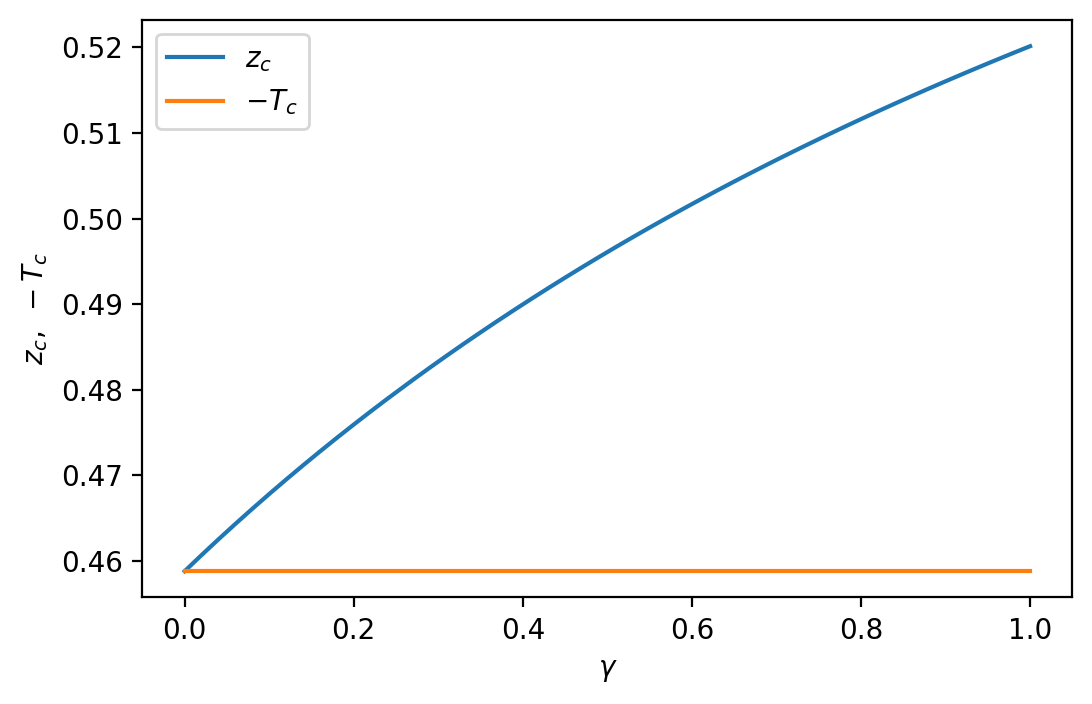

In [5]:
fig, ax = plt.subplots(figsize=[6,6/1.6])
ax.plot(γs, zcs, label=r'$z_c$')
ax.plot(γs, -Tcs, label=r'$-T_c$')
ax.set_xlabel(r'$\gamma$')
ax.set_ylabel(r'$z_c,~-T_c$')
ax.legend()

In [6]:
np.savetxt(f'gamma_{γs[0]}_{γs[-1]}_zc_Tc.csv', np.array([γs,zcs,Tcs]).T, delimiter=",")

In [7]:
Tcs = []
zcs = []
ε = 0.01
q0_min = 0.15
q0s = np.round(np.linspace(q0_min,1-ε,num=50),2)

β = 1.2
γ = 0.19
first_sol = True
for q0 in q0s:
    if first_sol:
        sols = find_zc_Tc(q0, γ, β)
        first_sol = False
    else:
        sols = find_zc_Tc(q0, γ, β, zc0=zcs[-1], Tc0=Tcs[-1])
    Tcs.append(sols[Tc])
    zcs.append(sols[zc])
zcs = np.array(zcs)
Tcs = np.array(Tcs)

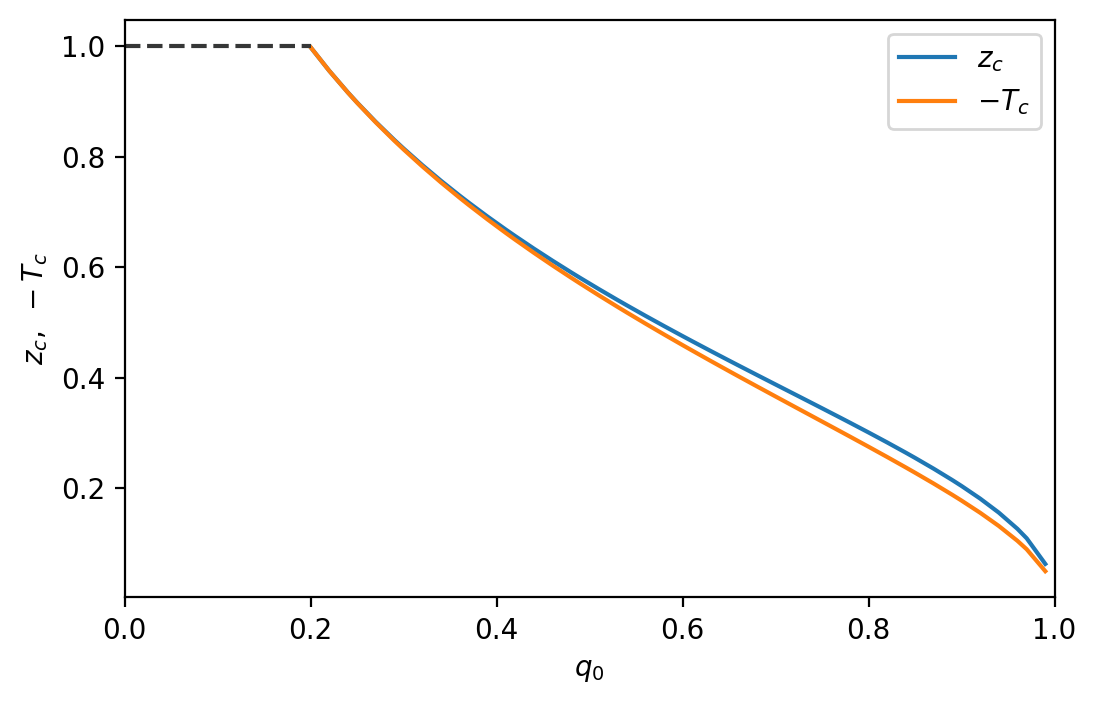

In [8]:
fig, ax = plt.subplots(figsize=[6,6/1.6])
mask = (zcs <= 1)
ax.plot(q0s[mask], zcs[mask], label=r'$z_c$')
ax.plot(q0s[mask], -Tcs[mask], label=r'$-T_c$')
ax.set_xlabel(r'$q_0$')
ax.set_ylabel(r'$z_c,~-T_c$')
ax.legend()
ax.set_xlim(0,1)
ax.plot((0,q0s[mask][0]),(1,1), color='xkcd:dark grey', linestyle='dashed')

In [9]:
np.savetxt(f'q0_{q0s[0]}_{q0s[-1]}_zc_Tc.csv', np.array([q0s,zcs,Tcs]).T, delimiter=",")

In [10]:
Tcs = []
zcs = []
βs = np.round(np.linspace(1,1.2,num=11),2)

q0 = 0.6
γ = 0.19
first_sol = True
for β in βs:
    if first_sol:
        sols = find_zc_Tc(q0, γ, β)
        first_sol = False
    else:
        sols = find_zc_Tc(q0, γ, β, zc0=zcs[-1], Tc0=Tcs[-1])
    Tcs.append(sols[Tc])
    zcs.append(sols[zc])

zcs = np.array(zcs)
Tcs = np.array(Tcs)

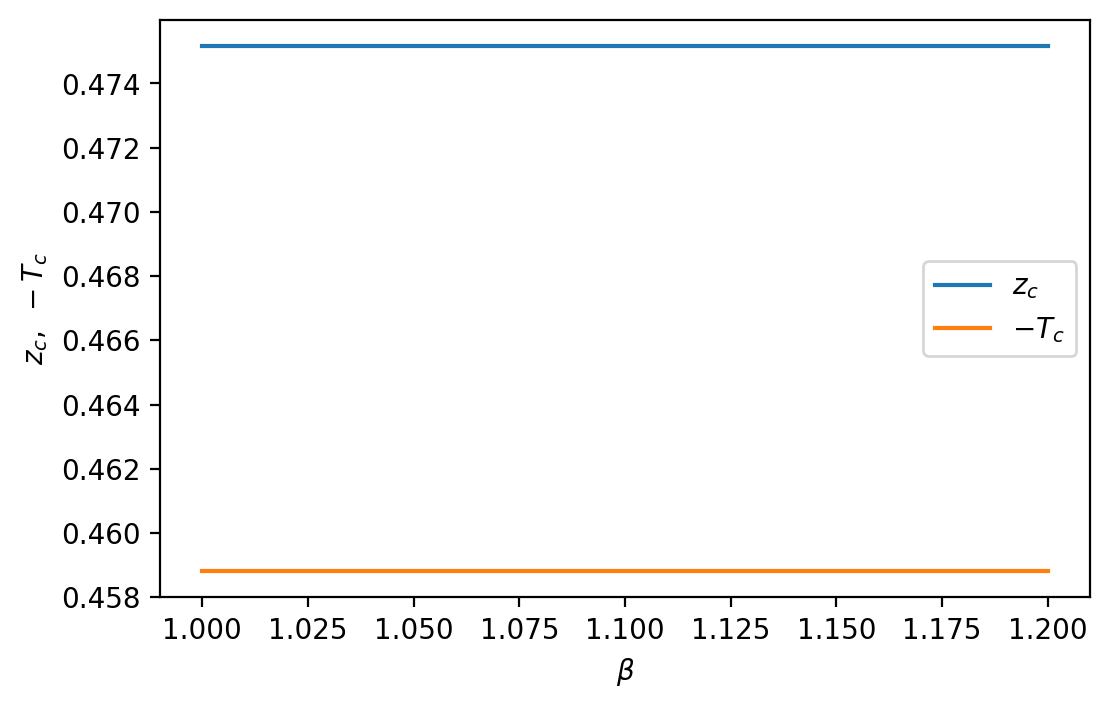

In [11]:
fig, ax = plt.subplots(figsize=[6,6/1.6])
ax.plot(βs, zcs, label=r'$z_c$')
ax.plot(βs, -Tcs, label=r'$-T_c$')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$z_c,~-T_c$')
ax.legend()

In [12]:
np.savetxt(f'beta_{βs[0]}_{βs[-1]}_zc_Tc.csv', np.array([βs,zcs,Tcs]).T, delimiter=",")